In [18]:
import warnings
warnings.filterwarnings('ignore')
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [19]:
import numpy as np
import pandas as pd

In [20]:
feature=[ 'src', 'dst', 'table_id', 'ip_bytes', 'ip_packet', 'ip_duration', 'in_port', 'dl_dst', 'port_bytes', 'port_packet', 'port_flow_count', 
'table_active_count', 'table_lookup_count', 'table_matched_count', 'port_rx_packets', 'port_tx_packets', 'port_rx_bytes', 'port_tx_bytes',
'port_rx_dropped', 'port_tx_dropped', 'port_rx_errors', 'port_tx_errors', 'port_rx_frame_err', 'port_rx_over_err', 'port_rx_crc_err',
'port_collisions', 'port_duration_sec']

In [21]:
benign=pd.read_csv('archive/normal_ditg.csv',names=feature)
g_c=pd.read_csv('archive/attack_bruteforce.csv',names=feature)
g_j=pd.read_csv('archive/attack_cmd.csv',names=feature)
g_s=pd.read_csv('archive/attack_ddos_tcp.csv',names=feature)
g_t=pd.read_csv('archive/attack_ddos_udp.csv',names=feature)
g_u=pd.read_csv('archive/attack_os_port_scan.csv',names=feature)
m_a=pd.read_csv('archive/attack_samba.csv',names=feature)
m_sc=pd.read_csv('archive/attack_sql_injection.csv',names=feature)
m_sy=pd.read_csv('archive/attack_vnc.csv',names=feature)

In [22]:
benign=benign.sample(frac=0.25,replace=False)
g_c=g_c.sample(frac=0.25,replace=False)
g_j=g_j.sample(frac=0.5,replace=False)
g_s=g_s.sample(frac=0.5,replace=False)
g_t=g_t.sample(frac=0.15,replace=False)
g_u=g_u.sample(frac=0.15,replace=False)
m_a=m_a.sample(frac=0.25,replace=False)
m_sc=m_sc.sample(frac=0.15,replace=False)
m_sy=m_sy.sample(frac=0.25,replace=False)

In [23]:
benign['type']='Normal'
g_c['type']='BruteForce'
g_j['type']='CMD'
g_s['type']='TCPDDOS'
g_t['type']='UDPDDOS'
g_u['type']='Probe'
m_a['type']='Smaba'
m_sc['type']='SQLInjection'
m_sy['type']='VNC'

In [24]:
benign.head()

,src,dst,table_id,ip_bytes,ip_packet,ip_duration,in_port,dl_dst,port_bytes,port_packet,...,port_rx_dropped,port_tx_dropped,port_rx_errors,port_tx_errors,port_rx_frame_err,port_rx_over_err,port_rx_crc_err,port_collisions,port_duration_sec,type
22163,10.0.0.2,10.0.0.3,0.0,18326.0,111.0,11.0,2.0,1a:16:b6:94:29:a4,18326.0,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34305.0,Normal
15771,10.0.0.1,10.0.0.2,0.0,233682.0,1479.0,30.0,1.0,16:75:96:93:29:54,233682.0,1479.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23273.0,Normal
27512,10.0.0.3,10.0.0.2,0.0,26400.0,400.0,40.0,3.0,16:75:96:93:29:54,26400.0,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41481.0,Normal
19590,10.0.0.3,10.0.0.1,0.0,240318.0,1521.0,31.0,3.0,32:41:12:b9:bd:3b,240318.0,1521.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30361.0,Normal
27032,10.0.0.1,10.0.0.3,0.0,39076.0,236.0,23.0,1.0,1a:16:b6:94:29:a4,39076.0,236.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40984.0,Normal


In [25]:
data = pd.concat([benign,g_c,g_j,g_s,g_t,g_u,m_a,m_sc,m_sy])

In [26]:
data.head()

,src,dst,table_id,ip_bytes,ip_packet,ip_duration,in_port,dl_dst,port_bytes,port_packet,...,port_rx_dropped,port_tx_dropped,port_rx_errors,port_tx_errors,port_rx_frame_err,port_rx_over_err,port_rx_crc_err,port_collisions,port_duration_sec,type
22163,10.0.0.2,10.0.0.3,0.0,18326.0,111.0,11.0,2.0,1a:16:b6:94:29:a4,18326.0,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34305.0,Normal
15771,10.0.0.1,10.0.0.2,0.0,233682.0,1479.0,30.0,1.0,16:75:96:93:29:54,233682.0,1479.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23273.0,Normal
27512,10.0.0.3,10.0.0.2,0.0,26400.0,400.0,40.0,3.0,16:75:96:93:29:54,26400.0,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41481.0,Normal
19590,10.0.0.3,10.0.0.1,0.0,240318.0,1521.0,31.0,3.0,32:41:12:b9:bd:3b,240318.0,1521.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30361.0,Normal
27032,10.0.0.1,10.0.0.3,0.0,39076.0,236.0,23.0,1.0,1a:16:b6:94:29:a4,39076.0,236.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40984.0,Normal


In [27]:
data.head()

,src,dst,table_id,ip_bytes,ip_packet,ip_duration,in_port,dl_dst,port_bytes,port_packet,...,port_rx_dropped,port_tx_dropped,port_rx_errors,port_tx_errors,port_rx_frame_err,port_rx_over_err,port_rx_crc_err,port_collisions,port_duration_sec,type
22163,10.0.0.2,10.0.0.3,0.0,18326.0,111.0,11.0,2.0,1a:16:b6:94:29:a4,18326.0,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34305.0,Normal
15771,10.0.0.1,10.0.0.2,0.0,233682.0,1479.0,30.0,1.0,16:75:96:93:29:54,233682.0,1479.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23273.0,Normal
27512,10.0.0.3,10.0.0.2,0.0,26400.0,400.0,40.0,3.0,16:75:96:93:29:54,26400.0,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41481.0,Normal
19590,10.0.0.3,10.0.0.1,0.0,240318.0,1521.0,31.0,3.0,32:41:12:b9:bd:3b,240318.0,1521.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30361.0,Normal
27032,10.0.0.1,10.0.0.3,0.0,39076.0,236.0,23.0,1.0,1a:16:b6:94:29:a4,39076.0,236.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40984.0,Normal


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123533 entries, 22163 to 31793
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   src                  123533 non-null  object 
 1   dst                  123533 non-null  object 
 2   table_id             123533 non-null  float64
 3   ip_bytes             123533 non-null  float64
 4   ip_packet            123533 non-null  float64
 5   ip_duration          123533 non-null  float64
 6   in_port              123533 non-null  float64
 7   dl_dst               123533 non-null  object 
 8   port_bytes           123532 non-null  float64
 9   port_packet          123532 non-null  float64
 10  port_flow_count      123532 non-null  float64
 11  table_active_count   123532 non-null  float64
 12  table_lookup_count   123532 non-null  float64
 13  table_matched_count  123532 non-null  float64
 14  port_rx_packets      123532 non-null  float64
 15  port_tx_packets    

In [29]:
del data['src']
del data['dst']
del data['dl_dst']

In [30]:
data['type'].value_counts()

type
TCPDDOS         30619
CMD             20964
UDPDDOS         12655
Smaba           11948
SQLInjection    11282
VNC             10305
BruteForce      10253
Normal           9770
Probe            5737
Name: count, dtype: int64

In [31]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

data['type']= label_encoder.fit_transform(data['type'])

data['type'].unique()

array([2, 0, 1, 6, 7, 3, 5, 4, 8])

In [32]:
data = data.dropna()

In [33]:
X = data.drop(["type"],axis =1)
y = data["type"]

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123532 entries, 22163 to 31793
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   table_id             123532 non-null  float64
 1   ip_bytes             123532 non-null  float64
 2   ip_packet            123532 non-null  float64
 3   ip_duration          123532 non-null  float64
 4   in_port              123532 non-null  float64
 5   port_bytes           123532 non-null  float64
 6   port_packet          123532 non-null  float64
 7   port_flow_count      123532 non-null  float64
 8   table_active_count   123532 non-null  float64
 9   table_lookup_count   123532 non-null  float64
 10  table_matched_count  123532 non-null  float64
 11  port_rx_packets      123532 non-null  float64
 12  port_tx_packets      123532 non-null  float64
 13  port_rx_bytes        123532 non-null  float64
 14  port_tx_bytes        123532 non-null  float64
 15  port_rx_dropped    

In [35]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

selector = SelectPercentile(mutual_info_classif, percentile=35)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape


(123532, 9)

In [40]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['ip_bytes',
 'ip_packet',
 'port_bytes',
 'port_packet',
 'port_flow_count',
 'table_active_count',
 'port_rx_packets',
 'port_rx_bytes',
 'port_tx_bytes']

In [41]:
df = data[['ip_bytes',
                 'ip_packet',
                 'port_bytes',
                 'port_packet',
                 'port_flow_count',
                 'table_active_count',
                 'port_rx_packets',
                 'port_rx_bytes',
                 'port_tx_bytes',
                  'type']]
df.to_csv('processed.csv')

In [42]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [40]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y, test_size=0.20, random_state=42)

In [41]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model 
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')

In [43]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
               
gs = GridSearchCV(knn, grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
g_res.best_score_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


0.9994029911156983

In [44]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1)

# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [46]:
params = {
    'max_depth': [2, 3],
    'min_samples_leaf': [5, 10],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=tree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)
grid_search.best_score_

Fitting 4 folds for each of 8 candidates, totalling 32 fits


0.8419950274269404

In [47]:
storeResults('Decision Tree',dt_acc,dt_prec,dt_rec,dt_f1)

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
forest =  RandomForestClassifier(n_estimators=10)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [49]:
param_grid = {
    'n_estimators': [5,25],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=25)


In [50]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1)

# Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model 
nb =  GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test,average='weighted')
nb_rec = recall_score(y_pred, y_test,average='weighted')
nb_f1 = f1_score(y_pred, y_test,average='weighted')

In [52]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=1.519911082952933e-06)


In [53]:
storeResults('Naive Bayes',nb_acc,nb_prec,nb_rec,nb_f1)

# Logistic Regresssion

In [54]:
from sklearn.linear_model import LogisticRegression

# instantiate the model 
lr =  LogisticRegression(random_state=0)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')

In [55]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(lr, param_grid, cv = 5)
 
logreg_cv.fit(X, y)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.43866007773495064


In [56]:
storeResults('Logistic Regression',lr_acc,lr_prec,lr_rec,lr_f1)

# AdaBoost Classifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier

# instantiate the model 
ada =  AdaBoostClassifier(n_estimators=100, random_state=0)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

ada_acc = accuracy_score(y_pred, y_test)
ada_prec = precision_score(y_pred, y_test,average='weighted')
ada_rec = recall_score(y_pred, y_test,average='weighted')
ada_f1 = f1_score(y_pred, y_test,average='weighted')

In [58]:
parameters = {
    'n_estimators': [1, 2, 3]
}
clf = GridSearchCV(ada, parameters, cv=5, verbose=1, n_jobs=1)
clf.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned AdaBoost Parameters: {}".format(clf.best_params_))
print("Best score is {}".format(clf.best_score_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Tuned AdaBoost Parameters: {'n_estimators': 2}
Best score is 0.5209863707937895


In [59]:
storeResults('AdaBoost Classifier',ada_acc,ada_prec,ada_rec,ada_f1)

# XGBoost

In [60]:
from xgboost import XGBClassifier

# instantiate the model 
xgb =  XGBClassifier(n_estimators=100, random_state=0)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

xgb_acc = accuracy_score(y_pred, y_test)
xgb_prec = precision_score(y_pred, y_test,average='weighted')
xgb_rec = recall_score(y_pred, y_test,average='weighted')
xgb_f1 = f1_score(y_pred, y_test,average='weighted')

In [61]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb, param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

In [62]:
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='roc_auc')

In [63]:
# Print the tuned parameters and score
print("Tuned AdaBoost Parameters: {}".format(gsearch1.best_params_))
print("Best score is {}".format(gsearch1.best_score_))

Tuned AdaBoost Parameters: {'max_depth': 3, 'min_child_weight': 1}
Best score is nan


In [64]:
storeResults('XGBoost',xgb_acc,xgb_prec,xgb_rec,xgb_f1)

# Stacking Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=1000)),('mlp', MLPClassifier(random_state=1, max_iter=3000))]

clf1 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=1000))


clf1.fit(X_train,y_train)

y_pred = clf1.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 98826, number of used features: 18
[LightGBM] [Info] Start training from score -2.494117
[LightGBM] [Info] Start training from score -1.771922
[LightGBM] [Info] Start training from score -2.540007
[LightGBM] [Info] Start training from score -3.063616
[LightGBM] [Info] Start training from score -2.380372
[LightGBM] [Info] Start training from score -2.338916
[LightGBM] [Info] Start training from score -1.399557
[LightGBM] [Info] Start training from score -2.281519
[LightGBM] [Info] Start training from score -2.476262
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [66]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

# Voting Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


eclf1 = VotingClassifier(estimators=[('dt', tree), ('rf', forest)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [68]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1)

# Comparison

In [69]:
#creating dataframe
import pandas as pd
import numpy as np
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                        
                      })

In [70]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,KNN,0.999,0.999,0.999,0.999
1,Decision Tree,0.999,0.999,0.999,0.999
2,Random Forest,0.999,0.999,0.999,0.999
3,Naive Bayes,0.774,0.779,0.774,0.830
4,Logistic Regression,0.423,0.513,0.423,0.836
5,AdaBoost Classifier,0.547,0.636,0.547,0.922
6,XGBoost,1.000,1.000,1.000,1.000
7,Stacking Classifier,1.000,1.000,1.000,1.000
8,Voting Classifier,0.999,0.999,0.999,0.999


# Modelling

In [71]:
import joblib
filename = 'model1.sav'
joblib.dump(clf1, filename)


['model1.sav']

# Graph

In [72]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

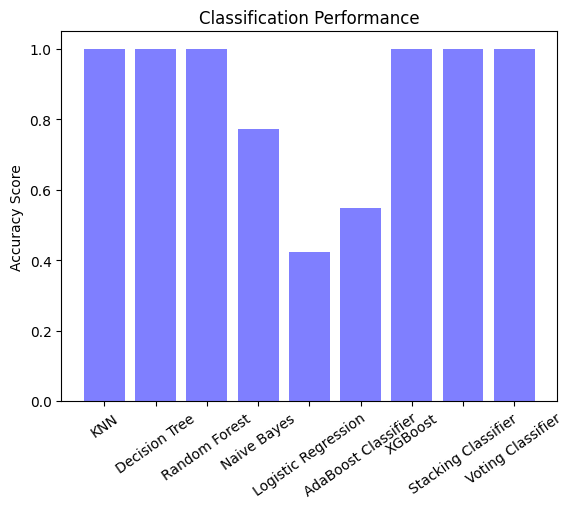

In [73]:
import matplotlib.pyplot as plt2
plt2.bar(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.xticks(y_pos, classifier, rotation = 35 )
plt2.ylabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

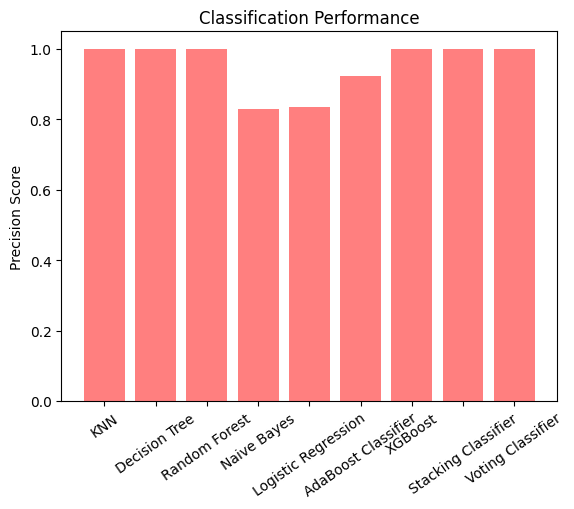

In [74]:
import matplotlib.pyplot as plt2
plt2.bar(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.xticks(y_pos, classifier, rotation=35)
plt2.ylabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

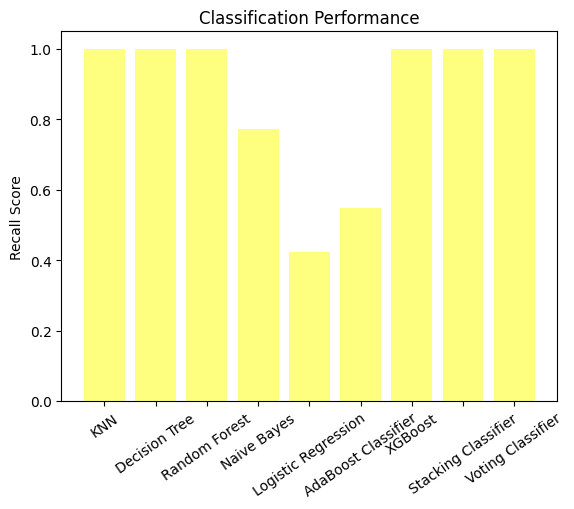

In [75]:
import matplotlib.pyplot as plt2
plt2.bar(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.xticks(y_pos, classifier,rotation=35)
plt2.ylabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 SCore

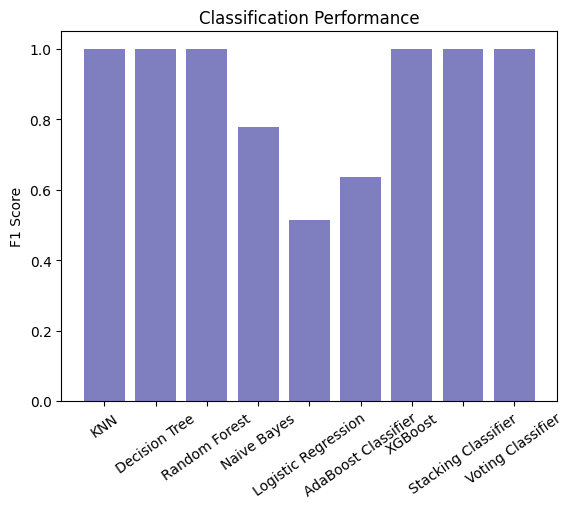

In [76]:
import matplotlib.pyplot as plt2
plt2.bar(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.xticks(y_pos, classifier,rotation=35)
plt2.ylabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

In [77]:
!python --version


Python 3.11.5


In [78]:
import sklearn
print(sklearn.__version__)

1.3.0
